
1. regresion lineal multivariable

NOMBRE: AMADOR YUCRA LUIS FERNANDO 

CARRERA: INGENIERIA DE SISTEMAS


LINK DE GITHUB: https://github.com/lfamadory/SIS420_IA_022024_/tree/a0a7d73695733fd44c109cd8aa0c50ea87b2518c/LABORATORIOS/Laboratorio2



In [91]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

1.1 Cargamos los datos del dataset

cargamos los datos haciendo el uso de la libreria Pandas que es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [92]:
# Cargamos los datos
data = pd.read_csv('Reuters Newswire Topics Dataset.csv', delimiter=',')

# Retiramos la columna 'Class' para el vector Y
dataset = data.astype(float)

# Separando el 80% para entrenamiento y el 20% para pruebas
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separar las características y la etiqueta en el conjunto de prueba
X_regre_test = test_dataset.drop(['Class'], axis=1).values
y_regre_test = test_dataset['Class'].values

# Separar las características y la etiqueta en el conjunto de entrenamiento
X_regre = train_dataset.drop(['Class'], axis=1).values
y_regre = train_dataset['Class'].values
m_regre = len(y_regre)

# Imprimir todas las X de datos, solo 10 ejemplos
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
    'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Class'
))
print('-' * 210)

for i in range(10):
    print('{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}{:10.0f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5], X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9],
        X_regre[i, 10], X_regre[i, 11], X_regre[i, 12], X_regre[i, 13], X_regre[i, 14], X_regre[i, 15], X_regre[i, 16], X_regre[i, 17], X_regre[i, 18], y_regre[i]
    ))

 Feature_1 Feature_2 Feature_3 Feature_4 Feature_5 Feature_6 Feature_7 Feature_8 Feature_9Feature_10Feature_11Feature_12Feature_13Feature_14Feature_15Feature_16Feature_17Feature_18Feature_19     Class
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         0         1         0         6         4         1         3       130        55       114        32        72       104        58        84        35        31        34       130         3
         0         1         0         1         3         5         5       147       122        39        41       113        73        93        97       138       133        63       131         1
         0         1         3         6         9         3         7        93        97       115       121        36       134        33        55        42        97        78      

1.2 Normalización de caracteristicas


Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. En este caso


Hacemos el uso de la siguiente funcion para normalizar los datos

In [93]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalizamos los datos

In [94]:
# Normalizar las características
X_norm, mu_regre, sigma_regre = featureNormalize(X_regre)

# Imprimir las primeras 10 filas de datos normalizados
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', 'X_norm[:, 1]', 'X_norm[:, 2]', 'X_norm[:, 3]', 'X_norm[:, 4]', 'X_norm[:, 5]', 'X_norm[:, 6]', 'X_norm[:, 7]', 'X_norm[:, 8]', 'X_norm[:, 9]',
    'X_norm[:,10]', 'X_norm[:,11]', 'X_norm[:,12]', 'X_norm[:,13]', 'X_norm[:,14]', 'X_norm[:,15]', 'X_norm[:,16]', 'X_norm[:,17]', 'X_norm[:,18]'
))
print('-' * 190)

for i in range(10):
    print('{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9],
        X_norm[i, 10], X_norm[i, 11], X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17], X_norm[i, 18]
    ))

print('Media calculada:', mu_regre)
print('Desviación estándar calculada:', sigma_regre)

X_norm[:,0]X_norm[:, 1]X_norm[:, 2]X_norm[:, 3]X_norm[:, 4]X_norm[:, 5]X_norm[:, 6]X_norm[:, 7]X_norm[:, 8]X_norm[:, 9]X_norm[:,10]X_norm[:,11]X_norm[:,12]X_norm[:,13]X_norm[:,14]X_norm[:,15]X_norm[:,16]X_norm[:,17]X_norm[:,18]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   -1.6206    0.1386   -1.6199    0.3684   -0.5153   -1.3075   -0.7060    1.1785   -0.7911    0.7774   -1.3958   -0.3417    0.4984   -0.7183   -0.0154   -1.3460   -1.4386   -1.3612    1.1912
   -0.7978    0.1108   -1.5873   -1.2917   -0.8068   -0.0781   -0.1233    1.6459    0.9841   -1.2130   -1.1633    0.7450   -0.3163    0.2101    0.3075    1.4209    1.2710   -0.6108    1.2248
   -0.5454    1.1452   -0.6898    0.3743    1.3307   -0.7617    0.6708    0.1916    0.3238    0.8051    0.9554   -1.2999    1.3015   -1.3778   -0.8052   -1.1406    0.3119   -0.1983    0.9982
    1.28

1.3 Graficar las caracteristicas

graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [95]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

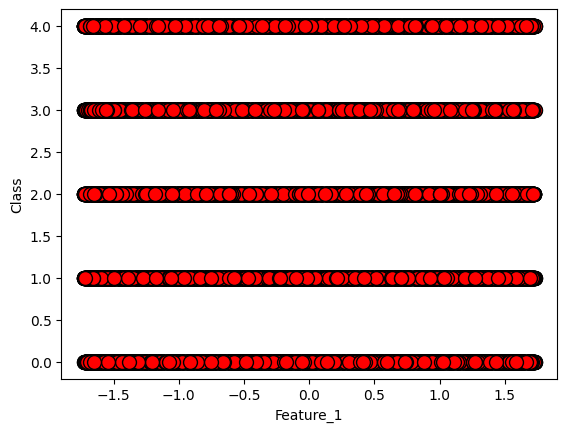

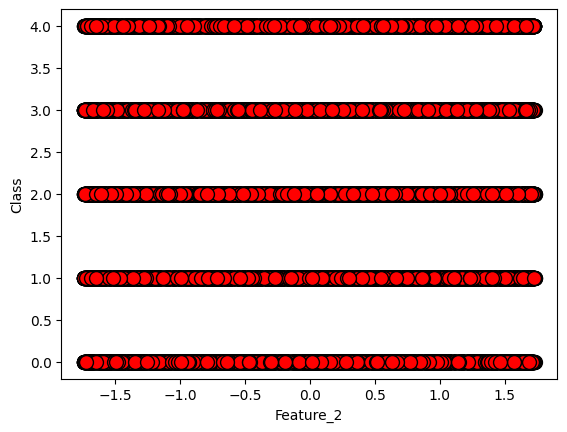

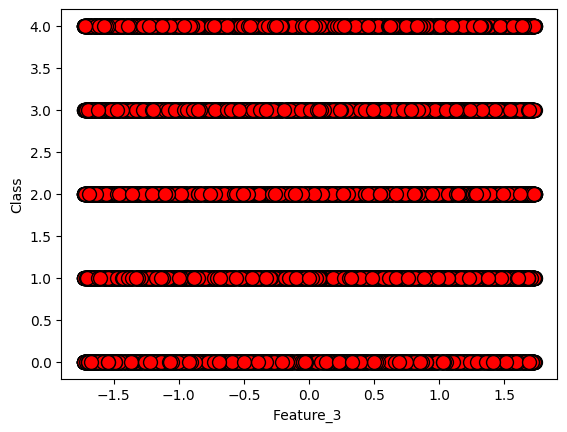

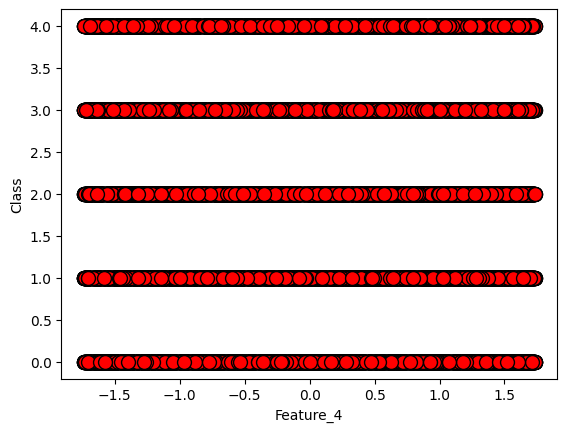

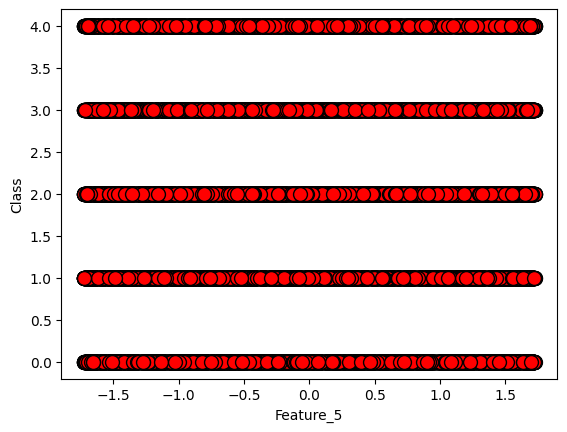

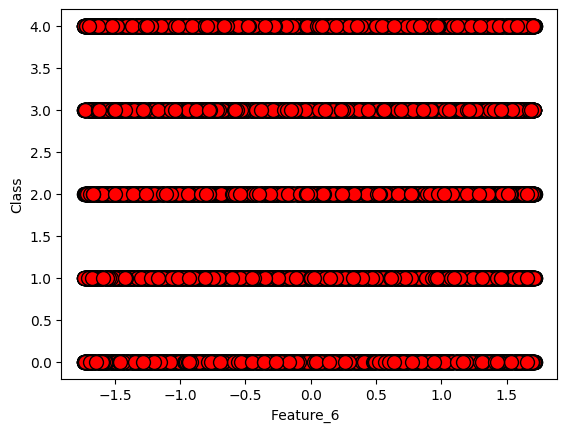

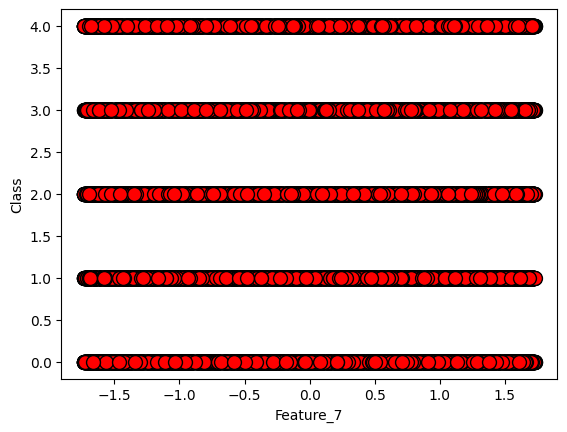

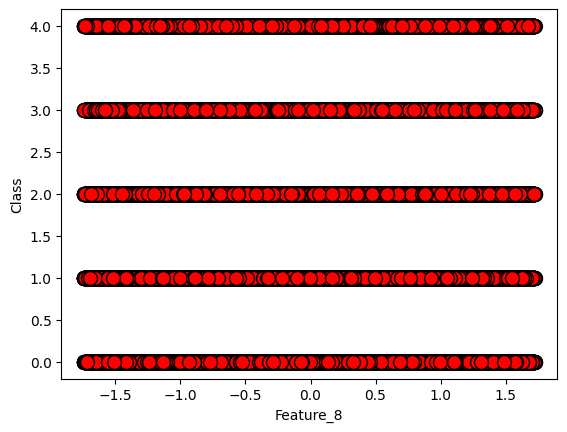

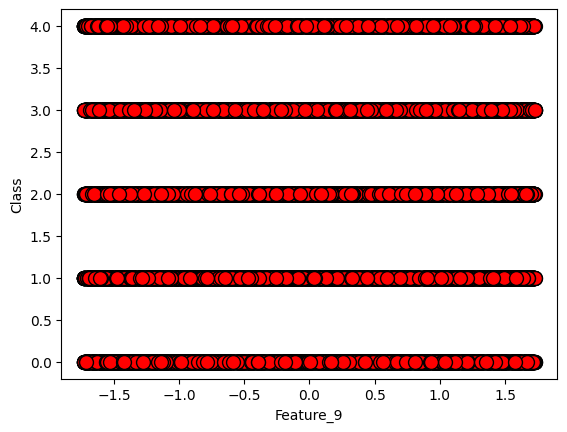

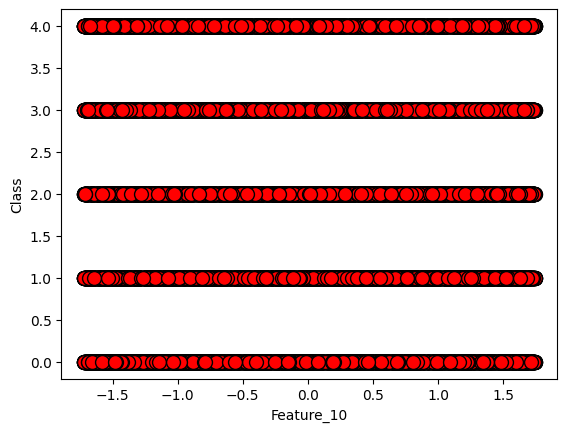

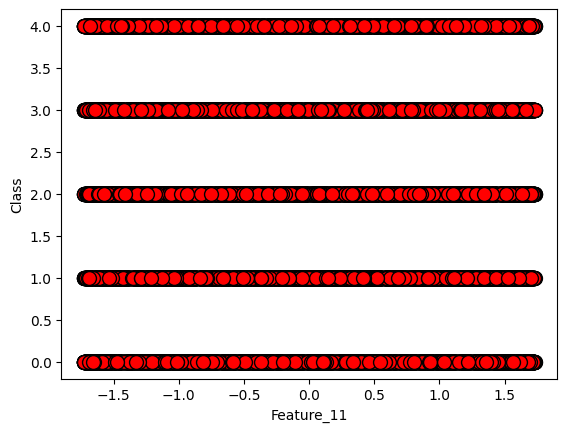

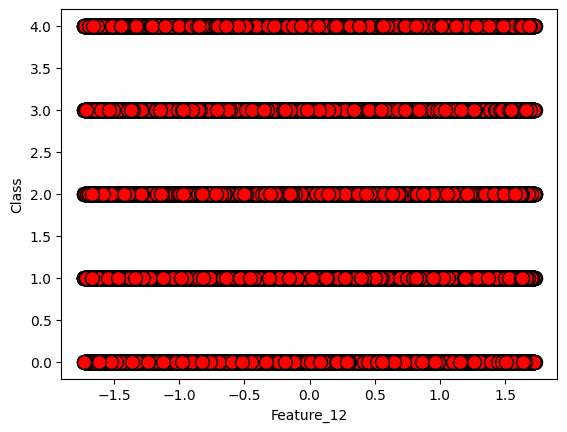

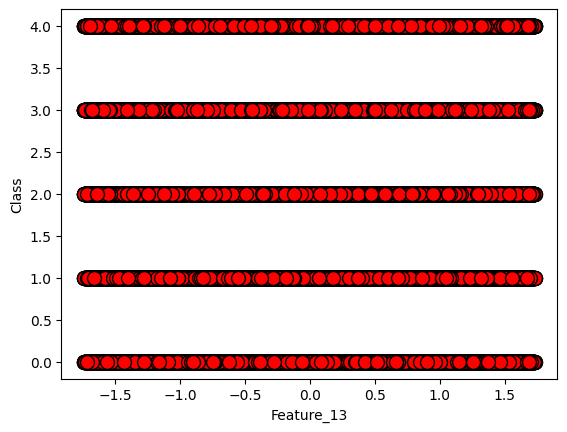

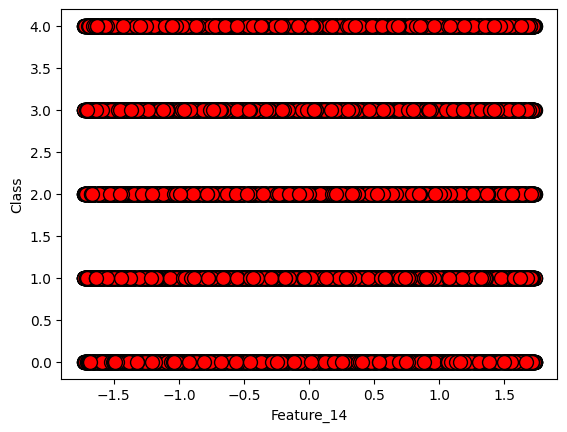

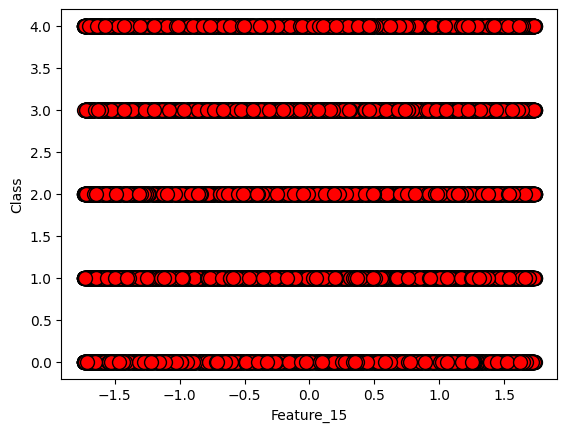

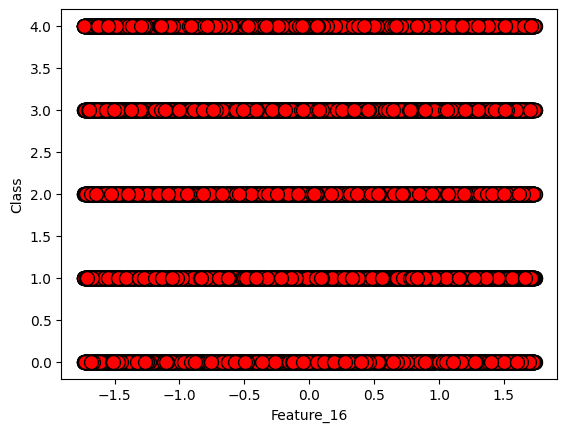

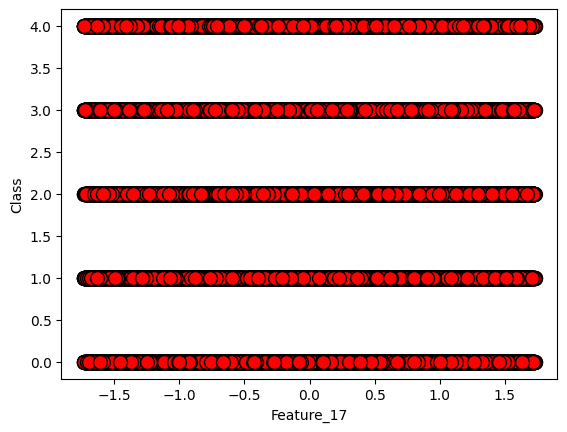

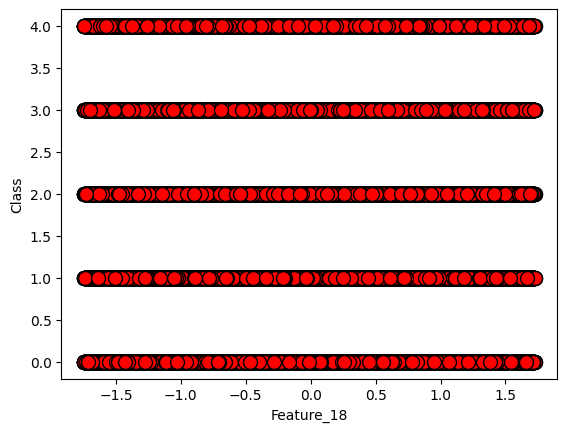

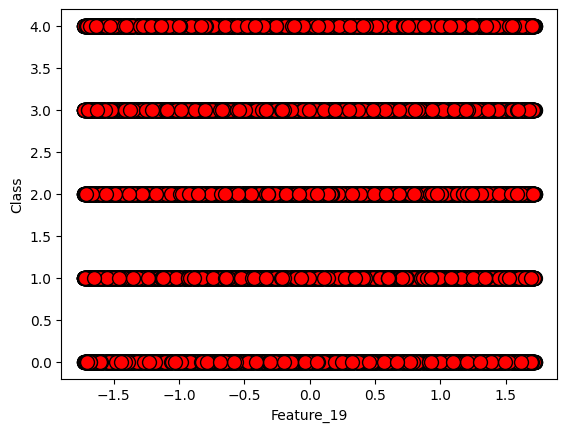

In [96]:
xlabel1 = "Feature_1"
xlabel2 = "Feature_2"
xlabel3 = "Feature_3 "
xlabel4 = "Feature_4"
xlabel5 = "Feature_5"
xlabel6 = "Feature_6  "
xlabel7 = "Feature_7"
xlabel8 = "Feature_8"
xlabel9 = "Feature_9"
xlabel10 = "Feature_10"
xlabel11 = "Feature_11"
xlabel12 = "Feature_12"
xlabel13 = "Feature_13"
xlabel14 = "Feature_14"
xlabel15 = "Feature_15"
xlabel16 = "Feature_16"
xlabel17 = "Feature_17"
xlabel18 = "Feature_18"
xlabel19 = "Feature_19"

ylabel1 = "Class"
graficarDatos(X_norm[:, 0], y_regre, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y_regre, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y_regre, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y_regre, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y_regre, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y_regre, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y_regre, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y_regre, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y_regre, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y_regre, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y_regre, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y_regre, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y_regre, xlabel13, ylabel1)
graficarDatos(X_norm[:, 13], y_regre, xlabel14, ylabel1)
graficarDatos(X_norm[:, 14], y_regre, xlabel15, ylabel1)
graficarDatos(X_norm[:, 15], y_regre, xlabel16, ylabel1)
graficarDatos(X_norm[:, 16], y_regre, xlabel17, ylabel1)
graficarDatos(X_norm[:, 17], y_regre, xlabel18, ylabel1)
graficarDatos(X_norm[:, 18], y_regre, xlabel19, ylabel1)
pass


1.4 Descenso por el gradiente

Primero agregamos unos a la matriz de X

1.4.1 Cálculo del costo 

In [97]:
# No olvidarse agregar unos a la matriz de x
X_ready = np.concatenate([np.ones((m_regre, 1)), X_norm], axis=1)

# Imprimimos X_ready
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ready[:,0]', 'X_ready[:,1]', 'X_ready[:,2]', 'X_ready[:,3]', 'X_ready[:,4]', 'X_ready[:,5]', 'X_ready[:,6]', 'X_ready[:,7]', 'X_ready[:,8]', 'X_ready[:,9]',
    'X_ready[:,10]', 'X_ready[:,11]', 'X_ready[:,12]', 'X_ready[:,13]', 'X_ready[:,14]', 'X_ready[:,15]', 'X_ready[:,16]', 'X_ready[:,17]', 'X_ready[:,18]', 'X_ready[:,19]'
))
print('-' * 210)

for i in range(10):
    print('{:10.0f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}{:10.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9],
        X_ready[i, 10], X_ready[i, 11], X_ready[i, 12], X_ready[i, 13], X_ready[i, 14], X_ready[i, 15], X_ready[i, 16], X_ready[i, 17], X_ready[i, 18], X_ready[i, 19]
    ))


X_ready[:,0]X_ready[:,1]X_ready[:,2]X_ready[:,3]X_ready[:,4]X_ready[:,5]X_ready[:,6]X_ready[:,7]X_ready[:,8]X_ready[:,9]X_ready[:,10]X_ready[:,11]X_ready[:,12]X_ready[:,13]X_ready[:,14]X_ready[:,15]X_ready[:,16]X_ready[:,17]X_ready[:,18]X_ready[:,19]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1   -1.6206    0.1386   -1.6199    0.3684   -0.5153   -1.3075   -0.7060    1.1785   -0.7911    0.7774   -1.3958   -0.3417    0.4984   -0.7183   -0.0154   -1.3460   -1.4386   -1.3612    1.1912
         1   -0.7978    0.1108   -1.5873   -1.2917   -0.8068   -0.0781   -0.1233    1.6459    0.9841   -1.2130   -1.1633    0.7450   -0.3163    0.2101    0.3075    1.4209    1.2710   -0.6108    1.2248
         1   -0.5454    1.1452   -0.6898    0.3743    1.3307   -0.7617    0.6708    0.1916    0.3238    0.8051    0.9554   -1.2999    1.

In [98]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de .

In [99]:
theta = np.array([0.5, -1.2, 0.3, 0.7, -0.5, 1.0, -0.8, 0.2, 1.5, -1.0, 0.3, 0.4, -0.2, 0.6, 0.1, -0.3, 0.5, -0.1, 0.2, 0.3])
theta1 = np.array([0.6, -1.1, 0.4, 0.8, -0.4, 1.2, -0.7, 0.3, 1.4, -1.2, 0.5, 0.6, -0.3, 0.7, 0.2, -0.2, 0.6, -0.2, 0.3, 0.4])

print(theta.shape[0])

print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta)}")
print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta1)}")

20
--------------------------------------------------------------------------------------
con theta:[ 0.5 -1.2  0.3  0.7 -0.5  1.  -0.8  0.2  1.5 -1.   0.3  0.4 -0.2  0.6
  0.1 -0.3  0.5 -0.1  0.2  0.3] se obtiene un costo de: 6.329371778123192
--------------------------------------------------------------------------------------
con theta:[ 0.6 -1.1  0.4  0.8 -0.4  1.2 -0.7  0.3  1.4 -1.2  0.5  0.6 -0.3  0.7
  0.2 -0.2  0.6 -0.2  0.3  0.4] se obtiene un costo de: 6.768766659539739


1.4.2 Descenso por el gradiente

El costo esta parametrizado por el vector , no X y. Donde hay que minimizar el valor de cambiando los valores del vector .
Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [100]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros con 0 y la taza de aprendizaje con 0.00009.

In [101]:
#creamos un theta con 20 columnas de ceros
theta = np.zeros(20)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 6000
alpha = 0.001

theta, J_historico = calcularDescensoGradiente(X_ready, y_regre, theta, alpha, num_ite)
print("--------------------------------------------------------------------------------------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"--------------------------------------------------------------------------------------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")



--------------------------------------------------------------------------------------
Los valores de theta calculados son:
theta 1: 2.00470257790873
theta 2: 0.0027579762057466524
theta 3: 0.012844787284770733
theta 4: 0.015974445947202782
theta 5: -0.010208904101787923
theta 6: 0.004154049127009687
theta 7: -0.0006894576983287716
theta 8: -0.0071279670797901136
theta 9: 0.019608147710140092
theta 10: 0.010116806481825162
theta 11: -0.005424693167390084
theta 12: -0.0030412847056486047
theta 13: 0.016753166752250085
theta 14: -0.009865649446988266
theta 15: -0.004129566041287414
theta 16: 0.014662284334717347
theta 17: 0.00668356500557563
theta 18: -0.010109904636678968
theta 19: -0.00558951218944032
theta 20: -0.00435497219619067
--------------------------------------------------------------------------------------
con un costo de: 1.0003021356855608 


Se utilizan los parametros finales para grafical la linea.

1.5 Grafica de la convergencia del costo

graficamos el costo

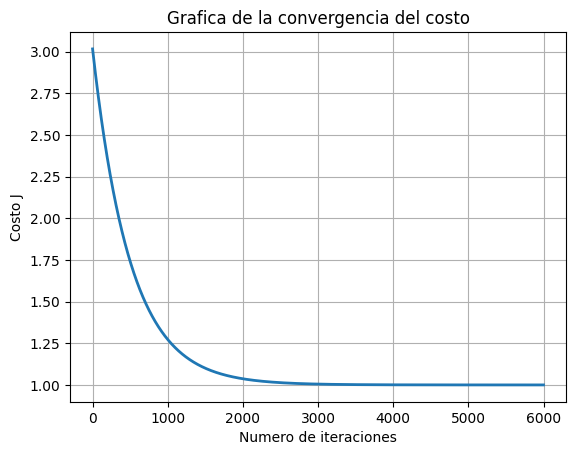

In [102]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.grid(True)  # Opcional: Agrega una cuadrícula para mejor visualización
pyplot.show()

1.5.1 Grafica de la regresion lineal


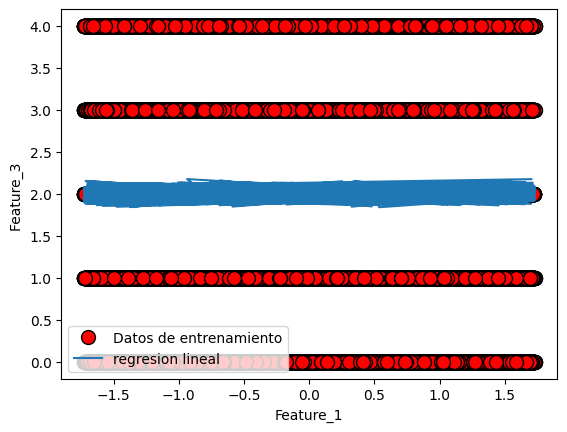

In [103]:
graficarDatos(X_ready[:, 1], y_regre, xlabel1, xlabel3)

pyplot.plot(X_ready[:,1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

1.6 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [104]:
# Creamos la matriz con 11 ejemplos para hacer la prueba de predicción:
matriz_datos_regre = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

# Creamos un vector para almacenar cada Y predicha
y_pre = []
matriz_datos_copy = matriz_datos_regre.copy()

# Normalizamos todos, menos el primer valor de cada ejemplo (el que es 1)
for datos in matriz_datos_regre:
    datos[1:] = (datos[1:] - mu_regre[1:]) / sigma_regre[1:]

# Calculamos la Y predicha de los 11 ejemplos de predicción
for datos in matriz_datos_regre:
    # Asegurarse de que tanto 'datos' como 'theta' tengan la misma cantidad de elementos
    if datos.shape[0] == theta.shape[0] - 1:
        datos = np.insert(datos, 0, 1)  # Insertar el valor constante "1" si es necesario
    y_pre.append(np.dot(datos, theta))

# Añadimos la columna de Y predicha a la matriz original
matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

# Nombres de las columnas para tu dataset
nombres_columnas = ['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9',
                    'Feature_10','Feature_11','Feature_12','Feature_13','Feature_14','Feature_15','Feature_16','Feature_17',
                    'Feature_18','Feature_19','Class']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+----------+
|   Feature_1 |   Feature_2 |   Feature_3 |   Feature_4 |   Feature_5 |   Feature_6 |   Feature_7 |   Feature_8 |   Feature_9 |   Feature_10 |   Feature_11 |   Feature_12 |   Feature_13 |   Feature_14 |   Feature_15 |   Feature_16 |   Feature_17 |   Feature_18 |   Feature_19 |    Class |
+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+==============+==============+==============+==============+==============+==============+==========+
|           1 |           3 |        1    |        1180 |        5650 |         1   |           0 |           0 |           3 |      

1.7 Validaciones

Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

1.7.1 Creacion de la funcion del error cuadratico medio

In [105]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre)

1.7.2 haciendo calculo del error cuadratico medio

In [106]:
#haciendo x_test que es el 20% restante
m_ready_regre = len(y_regre_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready_regre, 1)), X_regre_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu_regre) / sigma_regre

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_regre_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 1236.7107260711682
Raíz del Error Cuadrático Medio (RMSE) = 35.16689815822783


2. Regresion polinomica

Importamos PolynomialFeatures es una clase en scikit-learn que se utiliza para generar características polinómicas a partir de un conjunto de características existente. En el contexto de regresión polinómica, puedes usar PolynomialFeatures para generar nuevas características que son combinaciones polinómicas de las características originales.

In [107]:
from sklearn.preprocessing import PolynomialFeatures

2.1 Cargamos los datos del dataset

In [108]:
# Cargamos el dataset
data = pd.read_csv('Reuters Newswire Topics Dataset.csv', delimiter=',')

# Separando el 80% para entrenamiento y el 20% para pruebas
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separamos las características (X) y la etiqueta (y) para el conjunto de prueba
X_poli_test = test_dataset.drop(['Class'], axis=1).values
y_poli_test = test_dataset['Class'].values

# Indicamos el grado del polinomio, en este caso, de segundo grado
poly = PolynomialFeatures(degree=2)

# Seleccionamos las columnas para X y la columna 'class' para y en el conjunto de entrenamiento
X_poli = poly.fit_transform(train_dataset.drop(['Class'], axis=1).values)
y_poli = train_dataset['Class'].values
m_poli = len(y_poli)

# Imprimimos la cantidad de características transformadas en el primer ejemplo
print(len(X_poli[1]))

210


2.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

En este caso hacemos el uso de la siguiente funcion para normalizar los datos

In [109]:
# Usando la función de featureNormalize, pero solo los que están en la primera columna ya que la primera columna es de unos
X_norm_poli, mu_poli, sigma_poli = featureNormalize(X_poli[:, 1:])  # Normalizamos solo las características, excluyendo la primera columna de unos
X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_norm_poli], axis=1)  # Añadimos la columna de unos

# Reemplazamos la primera columna de características normalizadas con unos
X_poli_ready[:, 1] = 1

# Imprimimos algunos datos ya normalizados, y con 1 añadidos
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_poli_ready[:,0]', '  X_poli_ready[:, 1]', '  X_poli_ready[:, 2]', '  X_poli_ready[:, 3]', '  X_poli_ready[:, 4]', '  X_poli_ready[:, 5]',
    '  X_poli_ready[:, 6]', '  X_poli_ready[:, 7]', '  X_poli_ready[:, 8]', '  X_poli_ready[:, 9]', '  X_poli_ready[:, 10]', '  X_poli_ready[:, 11]',
    '  X_poli_ready[:, 12]', '  X_poli_ready[:, 13]', '  X_poli_ready[:, 14]', '  X_poli_ready[:, 15]', '  X_poli_ready[:, 16]', '  X_poli_ready[:, 17]', '  X_poli_ready[:, 18]'
))
print('-' * 182)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_poli_ready[i, 0], X_poli_ready[i, 1], X_poli_ready[i, 2], X_poli_ready[i, 3], X_poli_ready[i, 4], X_poli_ready[i, 5], X_poli_ready[i, 6], X_poli_ready[i, 7], X_poli_ready[i, 8],
        X_poli_ready[i, 9], X_poli_ready[i, 10], X_poli_ready[i, 11],
        X_poli_ready[i, 12], X_poli_ready[i, 13], X_poli_ready[i, 14], X_poli_ready[i, 15], X_poli_ready[i, 16], X_poli_ready[i, 17], X_poli_ready[i, 18]
    ))

print('Media calculada:', mu_poli)
print('Desviación estándar calculada:', sigma_poli)

X_poli_ready[:,0]  X_poli_ready[:, 1]  X_poli_ready[:, 2]  X_poli_ready[:, 3]  X_poli_ready[:, 4]  X_poli_ready[:, 5]  X_poli_ready[:, 6]  X_poli_ready[:, 7]  X_poli_ready[:, 8]  X_poli_ready[:, 9]  X_poli_ready[:, 10]  X_poli_ready[:, 11]  X_poli_ready[:, 12]  X_poli_ready[:, 13]  X_poli_ready[:, 14]  X_poli_ready[:, 15]  X_poli_ready[:, 16]  X_poli_ready[:, 17]  X_poli_ready[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  1.0000           1.0000       0.1386       -1.6199         0.3684       -0.5153       -1.3075       -0.7060        1.1785       -0.7911         0.7774        -1.3958        -0.3417         0.4984        -0.7183        -0.0154        -1.3460        -1.4386
  1.0000           1.0000       0.1108       -1.5873        -1.2917       -0.8068       -0.0781       -0.1233        1.6459        0.9841        -1.2130        -1.1633     

2.3 Descenso por el gradiente

Una vez ya tenido los datos listos y normalizados, se procede al calculo del costo.

2.3.1 Cálculo del costo 

Ejemplo de funcionamiento de la funcion calcularCosto con dos valores diferentes de .

In [116]:
# Generar un vector aleatorio entre 0 y 1 con longitud 190
theta_poli = np.random.rand(len(X_poli_ready[1]))

print(theta_poli.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"--------------------------------------------------------------------------------------------------------")
print(f"con theta:{ theta_poli } se obtiene un costo de: {calcularCosto(X_poli_ready, y_poli, theta_poli)}")
print(f"--------------------------------------------------------------------------------------------------------")

210
--------------------------------------------------------------------------------------------------------
con theta:[0.51565266 0.44148902 0.60129912 0.17814867 0.84932356 0.90561592
 0.45524488 0.87104898 0.22999264 0.36979552 0.6253768  0.02307127
 0.01790704 0.12882455 0.01368133 0.36810834 0.61944273 0.04986069
 0.57571145 0.84182091 0.51036271 0.31839227 0.23201892 0.25406683
 0.48761302 0.665189   0.63947161 0.46689187 0.69631943 0.52631434
 0.34491773 0.47442131 0.03115053 0.27330146 0.63451646 0.58179211
 0.60662667 0.98684291 0.21824555 0.6039898  0.15307363 0.28469572
 0.91731436 0.46496311 0.897035   0.75928838 0.38402739 0.42296539
 0.25522886 0.21833643 0.98264189 0.84105219 0.59395358 0.32954952
 0.09310289 0.12372846 0.43474018 0.95612307 0.43374862 0.42224076
 0.98059167 0.35516427 0.80766078 0.1879608  0.24051968 0.15607805
 0.41121509 0.67097495 0.93254008 0.42835424 0.05487771 0.44345054
 0.8785671  0.85691515 0.51906697 0.85731638 0.15033543 0.61065731
 0.4816409

2.3.2 Descenso por el gradiente

El costo esta parametrizado por el vector , no y. Donde hay que minimizar el valor de cambiando los valores del vector. 
Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de y verificar si estos decrecen en cada paso.

Se inicializan los parametros con 0 y la taza de aprendizaje con 0.001.

In [117]:
#creamos un theta con 190 columnas de ceros
theta_poli = np.zeros(len(X_poli_ready[1]))


num_ite_poli = 191
alpha_poli = 0.009

theta_poli, J_historico_poli = calcularDescensoGradiente(X_poli_ready, y_poli, theta_poli, alpha_poli, num_ite_poli)
print("----------------------------------------------------------------------------------------------------------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_poli:
    i += 1
    print(f"theta {i}: {tht}")


print(f"----------------------------------------------------------------------------------------------------------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_poli[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

----------------------------------------------------------------------------------------------------------
Los valores de theta calculados son:
theta 1: 0.97354577156006
theta 2: 0.97354577156006
theta 3: 0.0013823443036925565
theta 4: -0.0003825907493514154
theta 5: 0.0014505030227703682
theta 6: -0.00025303809232707684
theta 7: -0.0010719271533533056
theta 8: -0.0001386910508470714
theta 9: 0.0030916326536818044
theta 10: 0.00032102851047069854
theta 11: -0.0018883381330270237
theta 12: -0.001488355195648043
theta 13: 0.0037159673828172333
theta 14: -0.0005136225852229715
theta 15: -0.001810508207122178
theta 16: 0.004986685985728761
theta 17: 0.00042260008294155865
theta 18: -0.002786396938296519
theta 19: -0.001615552356290339
theta 20: -0.0011193154096938583
theta 21: -0.0026047638669668347
theta 22: 0.010706323824277905
theta 23: -0.001591708372796934
theta 24: -0.0018067480747746285
theta 25: 0.0035628628374928095
theta 26: -0.00017902779293780716
theta 27: -0.000360767742594153

Se utilizan los parametros finales para grafica la linea.

2.4 Grafica de la convergencia del costo

graficamos el costo

[np.float64(2.9484256069678247), np.float64(2.878806738801313), np.float64(2.811689735108239), np.float64(2.7469818857784003), np.float64(2.6845944701082365), np.float64(2.6244424699157034), np.float64(2.566444325952283), np.float64(2.510521727948705), np.float64(2.4565994310904324), np.float64(2.404605093515007), np.float64(2.3544691307412067), np.float64(2.3061245839120543), np.float64(2.259506999454762), np.float64(2.2145543182987697), np.float64(2.1712067731972127), np.float64(2.1294067930027123), np.float64(2.0890989129810786), np.float64(2.0502296904249806), np.float64(2.012747624967535), np.float64(1.976603083103098), np.float64(1.9417482265067234), np.float64(1.9081369438103046), np.float64(1.875724785546337), np.float64(1.8444689020127367), np.float64(1.8143279838464443), np.float64(1.785262205121448), np.float64(1.7572331688097382), np.float64(1.730203854462545), np.float64(1.7041385679849), np.float64(1.6790028933896426), np.float64(1.6547636464280435), np.float64(1.63138883

Text(0, 0.5, 'Costo J')

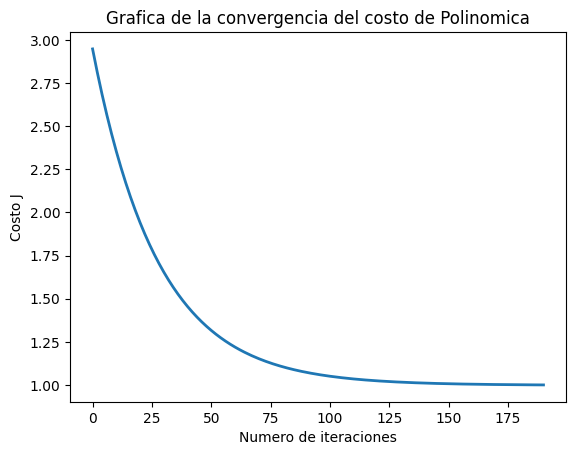

In [118]:
pyplot.plot(np.arange(len(J_historico_poli)), J_historico_poli, lw=2)
print(J_historico_poli)
pyplot.title("Grafica de la convergencia del costo de Polinomica")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

2.5 Grafica de la regresion Polinomica

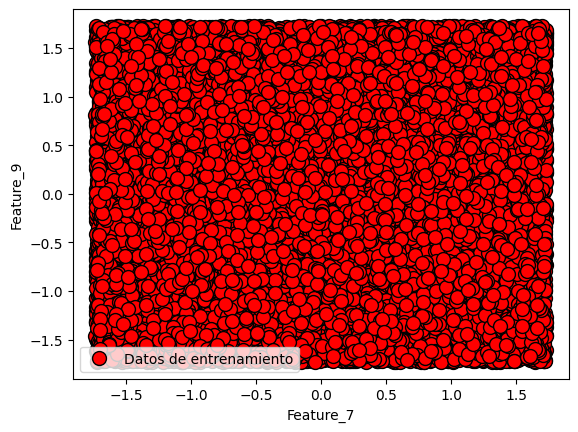

In [119]:
graficarDatos(X_poli_ready[:, 7], X_poli_ready[:,9], xlabel7, xlabel9)


pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])


2.6 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [121]:
# Datos de ejemplo para la predicción
matriz_datos_poli = np.array([
    [3,1,1180,5.650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5],
    [2,0.75,1.020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,5],
    [4,2.75,3.555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637,5],
    [2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575,5],
    [4,1.75,1.860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350,5],
    [1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762,5],
    [4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286,5],
    [4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969,5],
    [5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415,5],
    [3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096,5],
    [3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699,5]
])


# Reemplaza esto con los valores reales y asegúrate de que tenga la longitud correcta
#theta_poli = np.random.rand(191)  # Reemplaza esto con los valores reales y la longitud correcta

# Creamos la matriz para la predicción
poly_test = PolynomialFeatures(degree=2)
matriz_datos_poli_trans = poly_test.fit_transform(matriz_datos_poli)

# Añadimos una columna de unos al principio
matriz_datos_poli_trans = np.concatenate([np.ones((matriz_datos_poli_trans.shape[0], 1)), matriz_datos_poli_trans], axis=1)



# Normalizamos todas las características, excepto la primera columna
mu_poli = np.mean(matriz_datos_poli_trans[:, 1:], axis=0)
sigma_poli = np.std(matriz_datos_poli_trans[:, 1:], axis=0)
sigma_poli[sigma_poli == 0] = 1e-10  # Para evitar división por cero

matriz_datos_poli_trans[:, 1:] = (matriz_datos_poli_trans[:, 1:] - mu_poli) / sigma_poli



# Verifica si la dimensión de theta_poli coincide con la de los datos transformados
y_pre_poli = [np.dot(datos, theta_poli) for datos in matriz_datos_poli_trans]


# Añadimos la columna de Y predicha a la matriz original
matriz_datos_copy = np.column_stack((matriz_datos_poli, y_pre_poli))

# Nombres de columnas para el dataset
nombres_columnas = [
    'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 
    'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 
    'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 
    'Feature_19', 'Class'
]

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

ValueError: shapes (211,) and (191,) not aligned: 211 (dim 0) != 191 (dim 0)

2.7 Validaciones
Para hacer las validaciones correspondientes, se hizo el uso Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

2.7.1 haciendo calculo del error cuadratico medio

In [115]:
# Aplicamos la transformación polinómica a X_poli_test
poly_test = PolynomialFeatures(degree=2)
datos_poli_test = poly_test.fit_transform(X_poli_test)

# Añadimos una columna de unos al principio (esto ya debería estar en datos_poli_test)
# Solo para verificar que estamos añadiendo la columna de unos correctamente
datos_poli_test = np.concatenate([np.ones((datos_poli_test.shape[0], 1)), datos_poli_test], axis=1)

# Normalizamos todas las características excepto la primera columna (los unos)
# Asegúrate de que mu_poli y sigma_poli tienen la misma dimensión que las características transformadas
mu_poli = np.mean(datos_poli_test[:, 1:], axis=0)
sigma_poli = np.std(datos_poli_test[:, 1:], axis=0)
sigma_poli[sigma_poli == 0] = 1e-10  # Para evitar división por cero

# Normalizamos los datos de prueba
datos_poli_test[:, 1:] = (datos_poli_test[:, 1:] - mu_poli) / sigma_poli

# La primera columna (de unos) no se debe normalizar
datos_poli_test[:, 0] = 1

# Calculamos las predicciones

y_predicha_poli = [np.dot(data_test_ready, theta_poli) for data_test_ready in datos_poli_test]


# Convertimos y_predicha_poli a numpy array para el cálculo de métricas
y_predicha_poli = np.array(y_predicha_poli)

# Calculamos el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_poli_test, y_predicha_poli)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

ValueError: shapes (211,) and (191,) not aligned: 211 (dim 0) != 191 (dim 0)

3. Ecuacion de la normal

Hacemos uso de la funcion de la Normal, haremos uso de los datos cargados en X para garantizar que las variables no esten modificadas, se debe agregar la columna de unos a la matriz 
para tener el termino de intersección

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

3.1 Agregando la columna de unos a la matriz X para tener el termino de intersección

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargamos los datos
data = pd.read_csv('Reuters Newswire Topics Dataset.csv', delimiter=',')

# Seleccionamos las columnas de características (Feature_1 a Feature_19) y la columna 'class' como etiqueta
dataset = data.astype(float)

# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = dataset.sample(n=20000, random_state=42)

# Dividir el dataset en conjunto de entrenamiento y prueba
train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

# Separar las características y la etiqueta en el conjunto de prueba
X_ecuaNorma_test = test_dataset.drop(['Class'], axis=1).values
y_ecuaNorma_test = test_dataset['Class'].values

# Separar las características y la etiqueta en el conjunto de entrenamiento
X_ecuaNorma = train_dataset.drop(['Class'], axis=1).values
y_ecuaNorma = train_dataset['Class'].values
m_ecuaNorma = len(y_ecuaNorma)

# Añadimos unos a la X
X_ren = np.concatenate([np.ones((m_ecuaNorma, 1)), X_ecuaNorma], axis=1)

# Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ren[:,0]', '  X_ren[:, 1]', '  X_ren[:, 2]', '  X_ren[:, 3]', '  X_ren[:, 4]', '  X_ren[:, 5]', '  X_ren[:, 6]', '  X_ren[:, 7]', '  X_ren[:, 8]', '  X_ren[:, 9]', '  X_ren[:, 10]', '  X_ren[:, 11]',
    '  X_ren[:, 12]', '  X_ren[:, 13]', '  X_ren[:, 14]', '  X_ren[:, 15]', '  X_ren[:, 16]', '  X_ren[:, 17]', '  X_ren[:, 18]'
))
print('-' * 260)

for i in range(10):
    print('{:10.0f}{:12.0f}{:12.0f}{:15.0f}{:14.0f}{:12.0f}{:13.0f}{:14.0f}{:12.0f}{:14.0f}{:13.0f}{:14.0f}{:13.0f}{:14.0f}{:15.0f}{:13.0f}{:14.0f}{:15.0f}{:14.0f}'.format(
        X_ren[i, 0], X_ren[i, 1], X_ren[i, 2], X_ren[i, 3], X_ren[i, 4], X_ren[i, 5], X_ren[i, 6], X_ren[i, 7], X_ren[i, 8], X_ren[i, 9], X_ren[i, 10], X_ren[i, 11],
        X_ren[i, 12], X_ren[i, 13], X_ren[i, 14], X_ren[i, 15], X_ren[i, 16], X_ren[i, 17], X_ren[i, 18]
    ))

X_ren[:,0]  X_ren[:, 1]  X_ren[:, 2]  X_ren[:, 3]  X_ren[:, 4]  X_ren[:, 5]  X_ren[:, 6]  X_ren[:, 7]  X_ren[:, 8]  X_ren[:, 9]  X_ren[:, 10]  X_ren[:, 11]  X_ren[:, 12]  X_ren[:, 13]  X_ren[:, 14]  X_ren[:, 15]  X_ren[:, 16]  X_ren[:, 17]  X_ren[:, 18]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1           0           1              5             7           3            1             9         148            64           86            94           96           111            131           98            68            124            40
         1           0           1              0             7           8            4             9          54           105           70            50           36           121             63          100           100       

3.2 Calculando Theta

In [ ]:
# Calculamos thea haciendo uso de la funcion
theta2 = calcularThethaEcuacionNormal(X_ren, y_ecuaNorma);

print(f"---------------------------------------------------------------------------------------")

print("Los valores de theta usando la ecuacion de la normal es calculados son:")
i = 0
for tht2 in theta2:
    i += 1
    print(f"theta {i}: {tht2}")
print(f"---------------------------------------------------------------------------------------")


---------------------------------------------------------------------------------------
Los valores de theta usando la ecuacion de la normal es calculados son:
theta 1: 1.8267999720530215
theta 2: -0.004618714154329066
theta 3: -0.003592100120343101
theta 4: 0.005821021748440734
theta 5: 0.001491865513887754
theta 6: -0.0025106663985721028
theta 7: -0.0009434503758792255
theta 8: -0.0034931656525300295
theta 9: 0.0003997072607552193
theta 10: 0.00023968113717842687
theta 11: 0.0006021735970508287
theta 12: 0.00018198199998203533
theta 13: 0.00019766158338139684
theta 14: 8.269934333454561e-05
theta 15: -0.00019345060177069004
theta 16: 0.00010003477506615775
theta 17: 0.0004950319265489642
theta 18: -4.484098229515461e-05
theta 19: 2.9973886550388487e-05
theta 20: 9.187473203816788e-05
---------------------------------------------------------------------------------------


3.3 Ejemplos de Predicciones haciendo uso de la Ecuacion de la normal
Se creo una matriz con 11 ejemplos, donde se hace las predicciones correpondientes:

In [ ]:
import numpy as np
from tabulate import tabulate

# Ejemplo de datos en la matriz (debe ser reemplazado por datos reales)
matriz_datos_ecuaNorma = np.array([
    [1, 3, 1, 1180, 5650, 1, 0, 0, 3, 7, 1180, 0, 1955, 0, 98178, 47.5112, -122.257, 1340, 5650],
    [1, 2, 0.75, 1020, 1076, 2, 0, 0, 3, 7, 1020, 0, 2008, 0, 98144, 47.5941, -122.299, 1020, 1357],
    [1, 4, 2.75, 3555, 6565, 2, 0, 0, 3, 9, 3555, 0, 2014, 0, 98053, 47.6847, -122.017, 3625, 5637],
    [1, 2, 1, 1040, 13920, 1, 0, 0, 3, 6, 1040, 0, 1973, 2020, 98198, 47.3756, -122.306, 1100, 7575],
    [1, 4, 1.75, 1860, 7350, 1, 0, 0, 4, 7, 1090, 770, 1977, 2000, 98031, 47.3979, -122.174, 1710, 7350],
    [1, 1, 1, 1060, 54846, 1, 1, 4, 3, 5, 1060, 0, 1935, 0, 98070, 47.4716, -122.445, 2258, 31762],
    [1, 4, 1.5, 2220, 9496, 1, 0, 0, 4, 7, 1490, 730, 1954, 0, 98004, 47.6233, -122.206, 1800, 8286],
    [1, 4, 1.5, 1560, 6534, 1, 0, 0, 4, 7, 1560, 0, 1962, 0, 98007, 47.6012, -122.152, 1560, 6969],
    [1, 5, 3, 2510, 4125, 1.5, 0, 3, 5, 8, 1590, 920, 1925, 0, 98144, 47.5968, -122.29, 2190, 5415],
    [1, 3, 2.5, 1680, 2096, 2, 0, 0, 3, 8, 1380, 300, 2008, 0, 98117, 47.6904, -122.37, 1360, 2096],
    [1, 3, 2.25, 2020, 3600, 2, 0, 0, 3, 8, 2020, 0, 1998, 0, 98033, 47.6678, -122.165, 2070, 3699]
])

# Creamos un vector para almacenar cada Y predicha
y_pre_ecua = []
theta2 = np.random.rand(20)  # Asumiendo que theta2 es un vector de 20 parámetros (incluye el término de sesgo)

# Añadimos una columna de unos para el término de sesgo
matriz_datos_con_intercepto = np.column_stack((np.ones(matriz_datos_ecuaNorma.shape[0]), matriz_datos_ecuaNorma))

# Calculamos la Y predicha de los ejemplos de predicción
for datos in matriz_datos_con_intercepto:
    y_pre_ecua.append(np.dot(datos, theta2))

# Añadimos las predicciones a la matriz de datos
matriz_datos_ecuaNorma = np.column_stack((matriz_datos_ecuaNorma, y_pre_ecua))

# Nombres de columnas para el dataset
nombres_columnas = [f'Feature_{i+1}' for i in range(19)] + ['Predicted_class']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_ecuaNorma.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+
|   Feature_1 |   Feature_2 |   Feature_3 |   Feature_4 |   Feature_5 |   Feature_6 |   Feature_7 |   Feature_8 |   Feature_9 |   Feature_10 |   Feature_11 |   Feature_12 |   Feature_13 |   Feature_14 |   Feature_15 |   Feature_16 |   Feature_17 |   Feature_18 |   Feature_19 |   Predicted_class |
+=============+=============+=============+=============+=============+=============+=============+=============+=============+==============+==============+==============+==============+==============+==============+==============+==============+==============+==============+===================+
|           1 |           3 |        1    |        1180 |        5650 |         1   |           0 |       

3.4 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [ ]:
from sklearn.metrics import mean_squared_error
m_ready = len(y_ecuaNorma_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready, 1)), X_ecuaNorma_test], axis=1)

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta2))

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha, y_ecuaNorma_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 285379.5443004198
Raíz del Error Cuadrático Medio (RMSE) = 534.2092701371063
